# Hackathon 1, statistics.

This project illustrates the course LEPL1109. You will study the emission of PM2.5 fine particles in Shanghai and Beijing, measured by US embassy/offices. PM2.5 refers to atmospheric particulate matter (PM) that have a diameter less than 2.5 micrometers. In other words, it's used as a measure of pollution. 


## Report content

•	Grades are granted to the members whose names are in the Jupyter notebook. If your name doesn’t appear on the top of the notebook, you’ll get a 0, even though you are in a group on Moodle.

•	The jupyter notebook must be compiled with printed results and next submitted via moodle. The absence of compiled results (or non-printed values) leads to a lower grade.

•	Do not comment your results directly into cells of code. Use instead a Markdown cell. 

•	"Dry" code or results not followed by a minimum of analysis / comments will be penalized.


## Report submission

•	Deadline, see moodle website. Submission after the deadline will not be accepted.

•	To submit your report, go to the section “Hackathons” on Moodle and the subsection “Remise Hackathon 1”. You can upload your work there. Once you are sure that it is your final version, click the button “Envoyer le devoir”. It is important that you don’t forget to click on this button ! 

•	Reports that have not been uploaded through Moodle will not be corrected.


## Names and Noma of participants:

Part. 1: 

Part. 2: Simon

Part. 3:

Part. 4:

Part. 5: 

Part. 6:


# Air quality in China


PM2.5 consists of airborne particles with aerodynamic diameters less than 2.5 μm. They are known to adversely affect human
health. The U.S. Embassy in Beijing started releasing hourly PM2.5 readings in April 2008, followed by the consulates in Guangzhou, Shanghai, Chengdu, and Shenyang in November and December 2011, June 2012, and April 2013, respectively. China’s Ministry of Environmental Protection (MEP) began to report hourly PM2.5 data in 74 cities (which include the five cities with the U.S. diplomatic posts) from January 2013, which was extended to 338 cities in January 2015.

The time period for this data is between Jan 1st, 2010 to Dec 31st, 2015. Missing data are denoted as NA.

* No: row number
* year: year of data in this row
* month: month of data in this row
* day: day of data in this row
* hour: hour of data in this row
* season: season of data in this row
* PM: PM2.5 concentration (µg/m^3)
* DEWP: Dew Point (Celsius Degree)
* TEMP: Temperature (Celsius Degree)
* HUMI: Humidity (%)
* PRES: Pressure (hPa)
* cbwd: Combined wind direction
* Iws: Cumulated wind speed (m/s)
* precipitation: hourly precipitation (mm)
* Iprec: Cumulated precipitation (mm)

Reference: 

Liang, X., S. Li, S. Zhang, H. Huang, and S. X. Chen (2016), PM2.5 data reliability, consistency, and air quality assessment in five Chinese cities, J. Geophys. Res. Atmos., 121, 10220-10236.


## 1. Basic statistics


------------------------------------------------------------------------------------------------------
1.1. We will focus on PM2.5 hourly measurements done by the US offices between the 1/1/2012 and 31/12/2015 in Beijing and Shanghai. 

a) Load datasets and merge them. Take care to remove missing data (NA) and keep only days for which PM2.5 emissions are available **both** in Shanghai and Beijing (PM_US_Post). Notice that in a later question, you will also need PM2.5 emissions measured in Nongzhanguan.

Use the field 'season' to split the data of Shanghai and Bejing into:
* one sample for winter (season=4), 
* one sample for summer (season=2).
------------------------------------------------------------------------------------------------------

In [155]:
import csv

# Fonction pour lire les fichiers CSV et créer un dictionnaire indexé par les colonnes communes
def read_csv_as_dict(file_name):
    data = {}
    with open(file_name, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            # Créer une clé unique basée sur l'année, le mois, le jour, l'heure et la saison
            key = (row['year'], row['month'], row['day'], row['hour'], row['season'])
            data[key] = row
    return data

# Charger les données de Pékin et de Shanghai sous forme de dictionnaire
beijing_data = read_csv_as_dict("BeijingPM.csv")
shanghai_data = read_csv_as_dict("ShanghaiPM.csv")

# Fusionner les données en utilisant les clés communes
merged_data = []
for key in beijing_data:
    if key in shanghai_data:
        # Vérifier que PM_US Post n'est pas manquant pour Pékin et Shanghai
        if (beijing_data[key]['PM_US Post'] != 'NA' and 
            shanghai_data[key]['PM_US Post'] != 'NA'):
            merged_data.append({
                'year': key[0],
                'month': key[1],
                'day': key[2],
                'hour': key[3],
                'season': key[4],
                'PM_US_Post_Beijing': float(beijing_data[key]['PM_US Post']),
                'PM_US_Post_Shanghai': float(shanghai_data[key]['PM_US Post'])
            })

# Filtrer les données par saison (hiver = 4, été = 2)
def filter_by_season(data, season):
    return [row for row in data if row['season'] == str(season)]

# Créer les échantillons pour l'hiver et l'été
winter_data = filter_by_season(merged_data, 4)
summer_data = filter_by_season(merged_data, 2)

"""
print("Échantillon des données pour l'hiver :")
for row in winter_data[:5]:
    print(row)

print("\nÉchantillon des données pour l'été :")
for row in summer_data[:5]:
    print(row)
"""

'\nprint("Échantillon des données pour l\'hiver :")\nfor row in winter_data[:5]:\n    print(row)\n\nprint("\nÉchantillon des données pour l\'été :")\nfor row in summer_data[:5]:\n    print(row)\n'

b) Calculate the mean, variance, median, 25% and 75% quantiles of emissions during winter and summer in Shanghai and Beijing. Present them in clean table. Comment your results.

In [156]:
# Fonction pour extraire les valeurs de PM2.5 d'une liste de dictionnaires
def extract_pm_values(data, city_key):
    return [row[city_key] for row in data]

# Fonction pour calculer les statistiques manuellement (moyenne, variance, etc.)
def calculate_stats(data):
    data_sorted = sorted(data)
    n = len(data)
    
    mean = sum(data) / n
    variance = sum((x - mean) ** 2 for x in data) / (n - 1)
    median = data_sorted[n // 2] if n % 2 == 1 else (data_sorted[n // 2 - 1] + data_sorted[n // 2]) / 2
    q25 = data_sorted[int(n * 0.25)]
    q75 = data_sorted[int(n * 0.75)]
    
    return {
        'mean': mean,
        'variance': variance,
        'median': median,
        '25%': q25,
        '75%': q75
    }

# Extraire les valeurs de PM2.5 pour Pékin et Shanghai en hiver et en été
winter_beijing_pm = extract_pm_values(winter_data, 'PM_US_Post_Beijing')
summer_beijing_pm = extract_pm_values(summer_data, 'PM_US_Post_Beijing')
winter_shanghai_pm = extract_pm_values(winter_data, 'PM_US_Post_Shanghai')
summer_shanghai_pm = extract_pm_values(summer_data, 'PM_US_Post_Shanghai')

# Calculer les statistiques pour chaque ensemble de données
winter_beijing_stats = calculate_stats(winter_beijing_pm)
summer_beijing_stats = calculate_stats(summer_beijing_pm)
winter_shanghai_stats = calculate_stats(winter_shanghai_pm)
summer_shanghai_stats = calculate_stats(summer_shanghai_pm)

# Créer un tableau propre avec les statistiques pour chaque ville et saison
stats_table = {
    'Winter Beijing': winter_beijing_stats,
    'Summer Beijing': summer_beijing_stats,
    'Winter Shanghai': winter_shanghai_stats,
    'Summer Shanghai': summer_shanghai_stats
}

# Afficher les statistiques sous forme de tableau lisible
print("{:<20} {:<10} {:<10} {:<10} {:<10} {:<10}".format("Category", "Mean", "Variance", "Median", "25%", "75%"))
for season, stats in stats_table.items():
    print("{:<20} {:<10.2f} {:<10.2f} {:<10.2f} {:<10.2f} {:<10.2f}".format(
        season, stats['mean'], stats['variance'], stats['median'], stats['25%'], stats['75%']
    ))


Category             Mean       Variance   Median     25%        75%       
Winter Beijing       122.43     15509.30   82.00      21.00      180.00    
Summer Beijing       71.84      2978.23    59.00      30.00      100.00    
Winter Shanghai      76.19      3341.13    60.00      36.00      99.00     
Summer Shanghai      33.89      611.48     29.00      16.00      46.00     


Comments here:



-----------------------------------------------------------------------------------------------------------------------

1.2. Draw box plots of PM2.5 emissions in Beijing and Shanghai / summer & winter (in total 4 box plots).

Search on internet, what are the recommended maximum level of PM2.5 and comment your results.

------------------------------------------------------------------------------------------------------------------------



In [157]:
# Code here


Comments here:


## 2. Fit of distributions 


------------------------------------------------------------------------------------------------------

2.1. Fit a Gamma distribution to PM2.5 emissions in Beijing and Shanghai (winter & summer). Warning, in python, the Gamma distribution has a parameter of location which translate the distribution from $[0,+\infty)$ to $[loc,+\infty)$. Force its value to zero during the calibration (option floc=0) to consider only positive values.

a) Estimate Gamma parameters by log-likelihood maximization (MLE). Present them in a clean table **AND** calculate the log-likelihood.  

------------------------------------------------------------------------------------------------------

In [158]:
# Code here 
import numpy as np
from scipy.stats import gamma
from scipy.optimize import minimize

# Fonction pour ajuster une distribution Gamma et calculer le log-vraisemblance
def fit_gamma(data):
    # Estimer les paramètres de la distribution Gamma (shape, scale) par MLE
    shape, loc, scale = gamma.fit(data, floc=0)
    
    # Calculer le log-vraisemblance de la distribution ajustée
    log_likelihood = np.sum(gamma.logpdf(data, shape, loc=0, scale=scale))
    
    return shape, scale, log_likelihood

# Ajuster la distribution Gamma pour chaque ensemble de données
winter_beijing_gamma = fit_gamma(winter_beijing_pm)
summer_beijing_gamma = fit_gamma(summer_beijing_pm)
winter_shanghai_gamma = fit_gamma(winter_shanghai_pm)
summer_shanghai_gamma = fit_gamma(summer_shanghai_pm)

# Créer un tableau avec les paramètres estimés et le log-vraisemblance
gamma_params_table = {
    'Winter Beijing': winter_beijing_gamma,
    'Summer Beijing': summer_beijing_gamma,
    'Winter Shanghai': winter_shanghai_gamma,
    'Summer Shanghai': summer_shanghai_gamma
}

# Afficher les résultats sous forme de tableau propre
print("{:<20} {:<10} {:<10} {:<10}".format("Category", "Shape", "Scale", "Log-Likelihood"))
for season, params in gamma_params_table.items():
    shape, scale, log_likelihood = params
    print("{:<20} {:<10.4f} {:<10.4f} {:<10.2f}".format(season, shape, scale, log_likelihood))


Category             Shape      Scale      Log-Likelihood
Winter Beijing       0.9456     129.4764   -48542.15 
Summer Beijing       1.7008     42.2395    -43175.93 
Winter Shanghai      2.2496     33.8701    -43318.21 
Summer Shanghai      1.7587     19.2705    -36870.99 


b) Plot the 4 histograms of PM2.5 and add the fitted gamma pdf’s on the same plot. What is your overall feeling about the quality of estimation?

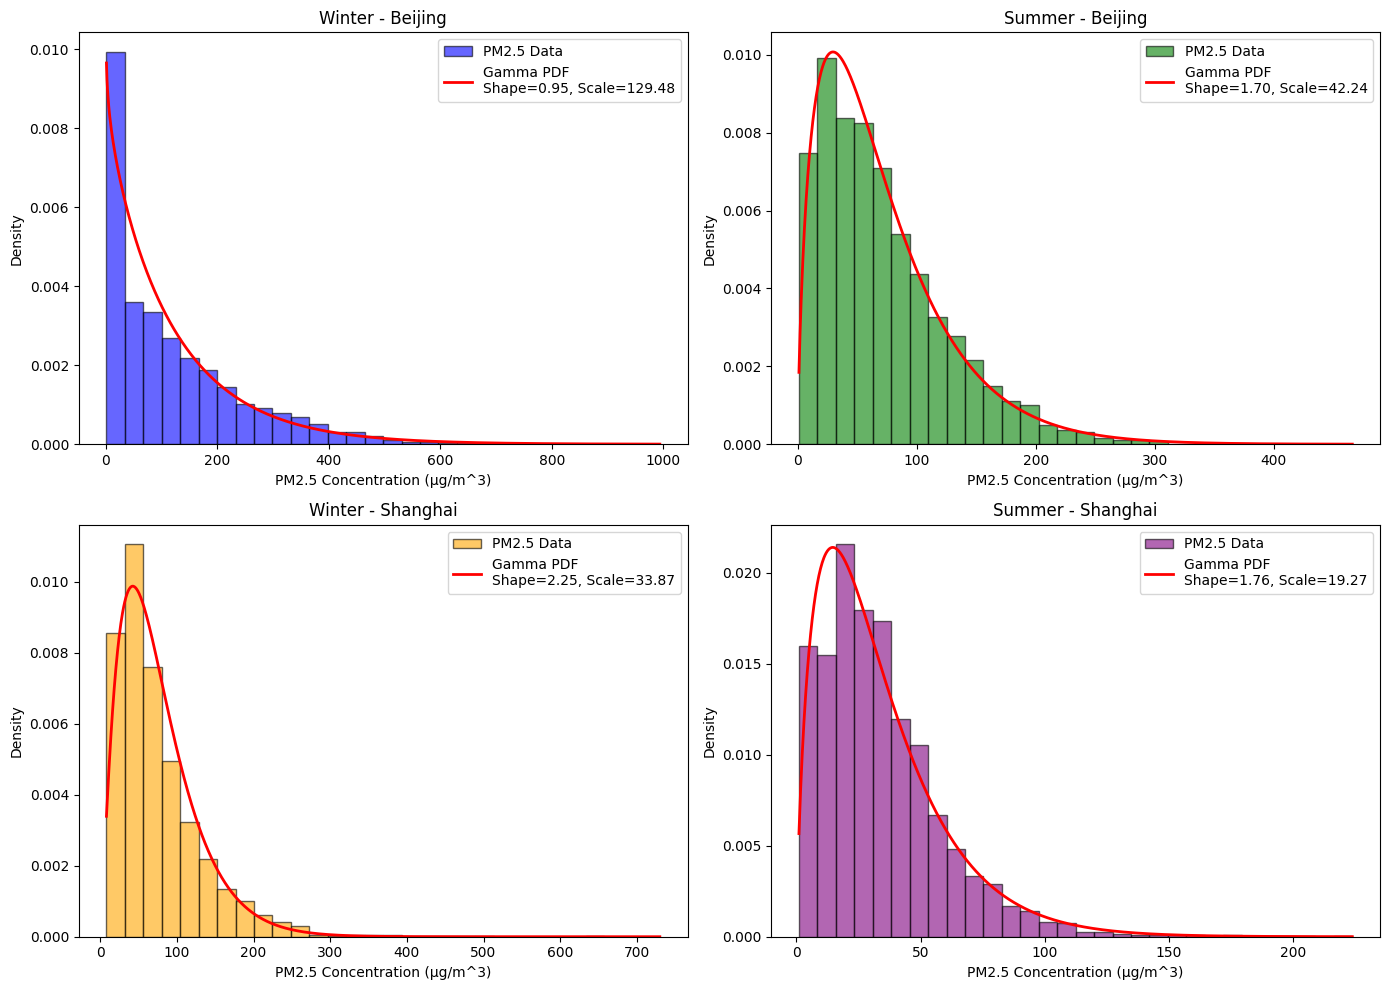

In [159]:
# Code here
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Fonction pour tracer l'histogramme et la distribution Gamma ajustée
def plot_histogram_with_gamma(data, shape, scale, title, color):
    # Tracer l'histogramme des données PM2.5
    plt.hist(data, bins=30, density=True, alpha=0.6, color=color, edgecolor='black', label='PM2.5 Data')

    # Créer un espace de valeurs pour la courbe ajustée
    x = np.linspace(min(data), max(data), 1000)
    y = gamma.pdf(x, shape, loc=0, scale=scale)

    # Tracer la courbe de la distribution Gamma ajustée
    plt.plot(x, y, 'r-', lw=2, label=f'Gamma PDF\nShape={shape:.2f}, Scale={scale:.2f}')

    # Ajouter le titre et les labels
    plt.title(title)
    plt.xlabel('PM2.5 Concentration (µg/m^3)')
    plt.ylabel('Density')
    plt.legend()

# Tracer les histogrammes et les distributions ajustées pour chaque jeu de données
plt.figure(figsize=(14, 10))

# Winter Beijing
plt.subplot(2, 2, 1)
plot_histogram_with_gamma(winter_beijing_pm, winter_beijing_gamma[0], winter_beijing_gamma[1], 'Winter - Beijing', 'blue')

# Summer Beijing
plt.subplot(2, 2, 2)
plot_histogram_with_gamma(summer_beijing_pm, summer_beijing_gamma[0], summer_beijing_gamma[1], 'Summer - Beijing', 'green')

# Winter Shanghai
plt.subplot(2, 2, 3)
plot_histogram_with_gamma(winter_shanghai_pm, winter_shanghai_gamma[0], winter_shanghai_gamma[1], 'Winter - Shanghai', 'orange')

# Summer Shanghai
plt.subplot(2, 2, 4)
plot_histogram_with_gamma(summer_shanghai_pm, summer_shanghai_gamma[0], summer_shanghai_gamma[1], 'Summer - Shanghai', 'purple')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()


Comments here:


------------------------------------------------------------------------------------------------------

2.2. You have fitted 4 gamma random variables to PM2.5 emissions in Shanghai, Beijing during summer and winter.

* Present the anatytical formulas of the mean and standard deviation of a gamma distribution. Calculate the expected levels and the standard devations of the PM2.5 emissions (in Shanghai, Beijing during summer and winter) relying on the fitted gamma random variables. 
* Calculate the 25%, 50% and 75% percentiles of these gamma distributions.
* Compare your results with the empirical statistics previously computed. Please comment your results.

------------------------------------------------------------------------------------------------------

In [160]:
# Code here
from scipy.stats import gamma

# Fonction pour calculer les statistiques attendues à partir des paramètres de la distribution Gamma
def calculate_expected_stats(shape, scale):
    mean = shape * scale
    std_dev = scale * np.sqrt(shape)
    
    # Calculer les quantiles à 25%, 50% et 75% à partir de la distribution Gamma ajustée
    q25 = gamma.ppf(0.25, shape, loc=0, scale=scale)
    q50 = gamma.ppf(0.50, shape, loc=0, scale=scale)
    q75 = gamma.ppf(0.75, shape, loc=0, scale=scale)
    
    return {
        'mean': mean,
        'std_dev': std_dev,
        '25%': q25,
        '50%': q50,
        '75%': q75
    }

# Calculer les statistiques attendues pour chaque distribution Gamma ajustée
winter_beijing_expected = calculate_expected_stats(winter_beijing_gamma[0], winter_beijing_gamma[1])
summer_beijing_expected = calculate_expected_stats(summer_beijing_gamma[0], summer_beijing_gamma[1])
winter_shanghai_expected = calculate_expected_stats(winter_shanghai_gamma[0], winter_shanghai_gamma[1])
summer_shanghai_expected = calculate_expected_stats(summer_shanghai_gamma[0], summer_shanghai_gamma[1])

# Créer un tableau propre avec les statistiques attendues
expected_stats_table = {
    'Winter Beijing': winter_beijing_expected,
    'Summer Beijing': summer_beijing_expected,
    'Winter Shanghai': winter_shanghai_expected,
    'Summer Shanghai': summer_shanghai_expected
}

# Afficher les résultats sous forme de tableau lisible
print("{:<20} {:<10} {:<10} {:<10} {:<10} {:<10}".format("Category", "Mean", "Std Dev", "25%", "50%", "75%"))
for season, stats in expected_stats_table.items():
    print("{:<20} {:<10.2f} {:<10.2f} {:<10.2f} {:<10.2f} {:<10.2f}".format(
        season, stats['mean'], stats['std_dev'], stats['25%'], stats['50%'], stats['75%']
    ))


Category             Mean       Std Dev    25%        50%        75%       
Winter Beijing       122.43     125.90     33.21      82.94      169.73    
Summer Beijing       71.84      55.09      31.49      58.36      97.71     
Winter Shanghai      76.19      50.80      38.85      65.25      101.75    
Summer Shanghai      33.89      25.56      15.16      27.73      46.01     


Comments here:



------------------------------------------------------------------------------------------------------

2.3. The quality of the MLE estimators depends upon many factors. One way to estimate it is to bootstrap the dataset. We will focus here exclusively on PM2.5 emissions in Beijing, during the winter time.

* Bootstrap 1000 times a sample of 6000 daily emissions for Beijing (winter) and plot an histogram of estimated alpha and scale parameters.

* Compute a 5% confidence interval for parameter(s) estimates for the best distribution obtained by MLE. 

* How do you interpret the results? Is the accuracy good?

------------------------------------------------------------------------------------------------------

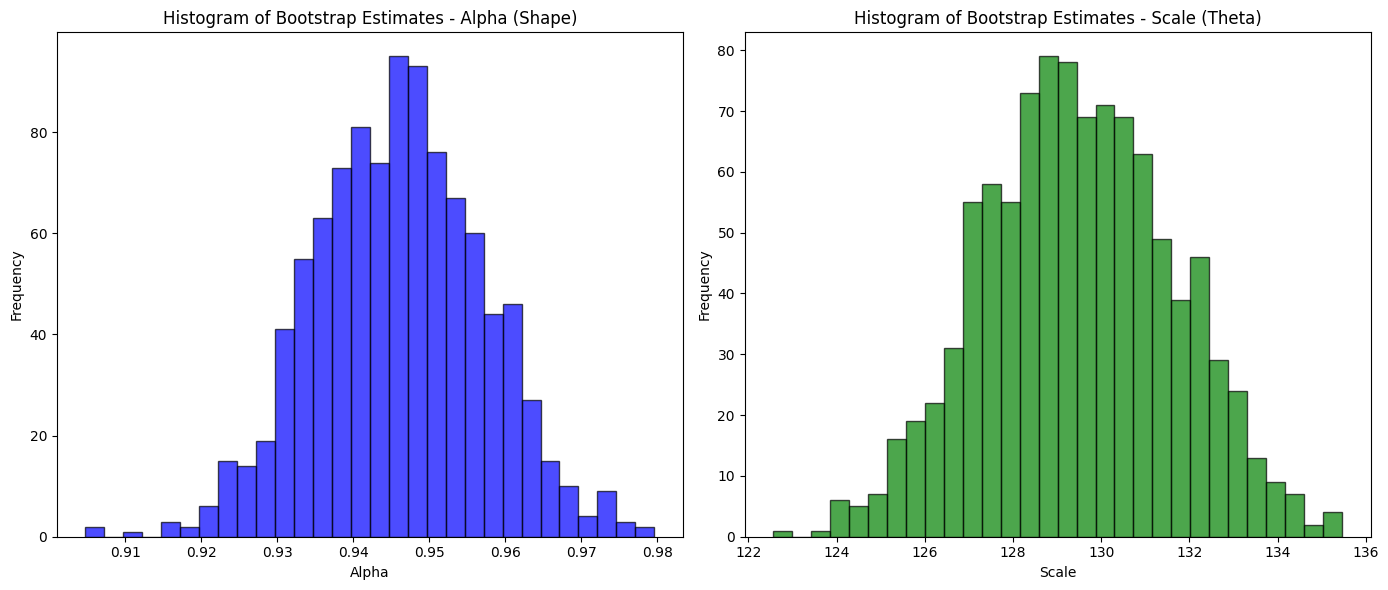

95% Confidence Interval for Alpha: [0.92393305 0.96797386]
95% Confidence Interval for Scale: [125.2373194  133.61854511]


In [161]:
#Code here
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Fonction pour ajuster les paramètres Gamma par MLE pour un échantillon donné
def fit_gamma(data):
    shape, loc, scale = gamma.fit(data, floc=0)
    return shape, scale

# Nombre de rééchantillons et taille de chaque échantillon
n_bootstrap = 1000
sample_size = 6000

# Stocker les estimations des paramètres de chaque rééchantillon
alpha_bootstrap = []
scale_bootstrap = []

# Exécuter la méthode bootstrap
np.random.seed(42)  # Pour reproductibilité
for _ in range(n_bootstrap):
    # Tirer un échantillon bootstrap aléatoire avec remise
    bootstrap_sample = np.random.choice(winter_beijing_pm, size=sample_size, replace=True)
    
    # Ajuster la distribution Gamma et stocker les paramètres
    alpha, scale = fit_gamma(bootstrap_sample)
    alpha_bootstrap.append(alpha)
    scale_bootstrap.append(scale)

# Tracer les histogrammes des paramètres estimés
plt.figure(figsize=(14, 6))

# Histogramme pour les valeurs alpha
plt.subplot(1, 2, 1)
plt.hist(alpha_bootstrap, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Bootstrap Estimates - Alpha (Shape)')
plt.xlabel('Alpha')
plt.ylabel('Frequency')

# Histogramme pour les valeurs scale
plt.subplot(1, 2, 2)
plt.hist(scale_bootstrap, bins=30, color='green', edgecolor='black', alpha=0.7)
plt.title('Histogram of Bootstrap Estimates - Scale (Theta)')
plt.xlabel('Scale')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Calculer les intervalles de confiance à 95% pour alpha et scale
alpha_ci = np.percentile(alpha_bootstrap, [2.5, 97.5])
scale_ci = np.percentile(scale_bootstrap, [2.5, 97.5])

print(f"95% Confidence Interval for Alpha: {alpha_ci}")
print(f"95% Confidence Interval for Scale: {scale_ci}")


Comments here:


## 3. Regression and forecasting 

------------------------------------------------------------------------------------------------------

3.1. In this question, you will determine if PM2.5 emissions levels depends upon weather conditions. We focus
on emissions measured by the US embassy in Beijing, during winter.

Regress PM2.5 emissions in Beijing (season 4) with respect to:
 * DEWP: Dew Point (Celsius Degree)
 * TEMP: Temperature (Celsius Degree)
 * HUMI: Humidity (%)
 * PRES: Pressure (hPa)
 * cbwd: Combined wind direction
 * Iws: Cumulated wind speed (m/s)
 * precipitation: hourly precipitation (mm)

The variable 'cbwd' is categorical. Convert it into dummy variables (0 or 1) with panda.get_dummies. Do not forget to drop one modality of this variable. Remove lines from the dataset with NaN entries.

* Use the OLS() function of the package statsmodels.api to perform the linear regression. 
* Comment your results (goodness of fit, R2, F-stat and T-stats of coefficients)
* Answer this : Does high hourly precipitation (mm) mitigate PM2.5 emissions?

------------------------------------------------------------------------------------------------------

In [162]:
import csv
from statistics import mean
import numpy as np

# Read Beijing winter data
beijing_winter_data = []
with open("BeijingPM.csv", 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        if row['season'] == '4' and row['PM_US Post'] != 'NA' and row['DEWP'] != 'NA' and row['TEMP'] != 'NA' and row['HUMI'] != 'NA' and row['PRES'] != 'NA' and row['cbwd'] != 'NA' and row['Iws'] != 'NA' and row['precipitation'] != 'NA':
            beijing_winter_data.append({
                'PM_US_Post': float(row['PM_US Post']),
                'DEWP': float(row['DEWP']),
                'TEMP': float(row['TEMP']),
                'HUMI': float(row['HUMI']),
                'PRES': float(row['PRES']),
                'cbwd': row['cbwd'],
                'Iws': float(row['Iws']),
                'precipitation': float(row['precipitation'])
            })

# Convert cbwd to dummy variables manually
cbwd_dummies = {'NW': [], 'NE': [], 'SE': []}  # Drop 'SW' to avoid multicollinearity
for row in beijing_winter_data:
    for direction in cbwd_dummies:
        cbwd_dummies[direction].append(1 if row['cbwd'] == direction else 0)

# Extract the dependent and independent variables
y = np.array([row['PM_US_Post'] for row in beijing_winter_data])
X = np.array([
    [
        1,  # Constant for intercept
        row['DEWP'],
        row['TEMP'],
        row['HUMI'],
        row['PRES'],
        row['Iws'],
        row['precipitation'],
        cbwd_dummies['NW'][i],
        cbwd_dummies['NE'][i],
        cbwd_dummies['SE'][i]
    ]
    for i, row in enumerate(beijing_winter_data)
])

# Calculate OLS coefficients: beta = (X^T X)^{-1} X^T y
X_transpose = X.T
beta = np.linalg.inv(X_transpose @ X) @ (X_transpose @ y)

# Calculate predictions and residuals
y_pred = X @ beta
residuals = y - y_pred

# Compute R-squared
ss_total = sum((y - mean(y)) ** 2)
ss_residual = sum(residuals ** 2)
r_squared = 1 - (ss_residual / ss_total)

# Output results
print("Coefficients:")
print(f"Intercept: {beta[0]:.4f}")
print(f"DEWP: {beta[1]:.4f}")
print(f"TEMP: {beta[2]:.4f}")
print(f"HUMI: {beta[3]:.4f}")
print(f"PRES: {beta[4]:.4f}")
print(f"Iws: {beta[5]:.4f}")
print(f"Precipitation: {beta[6]:.4f}")
print(f"NW: {beta[7]:.4f}")
print(f"NE: {beta[8]:.4f}")
print(f"SE: {beta[9]:.4f}")

print(f"\nR-squared: {r_squared:.4f}")


Coefficients:
Intercept: 2474.0285
DEWP: 0.7013
TEMP: 3.1491
HUMI: 2.8105
PRES: -2.3781
Iws: -0.0886
Precipitation: -226.0789
NW: -40.3377
NE: -32.3099
SE: -17.1456

R-squared: 0.4745


Comments here:


------------------------------------------------------------------------------------------------------

3.2. We design a simple auto-regressive model for predicting the PM 2.5 emissions over the next hour, in Beijing, measured at the US embassy (warning, we consider emissions between the 1/1/2012 and 31/12/2015 and during all seasons).

Let us denote by E(t) the emission at time 't'. We an autoregressive model defined as follows:

$$E(t) = \sum_{k=1}^{3} a_k E(t-k) $$

a. We split the dataset into a training set (the first 75% of data included) and a validation set (the remaining 25%).

b.	Estimate this model with statsmodels on the training set. 

c.	Analyze statistics reported by statsmodel.

------------------------------------------------------------------------------------------------------

In [163]:
# Code here
import csv
import numpy as np

# Load data for Beijing between 2012-2015
beijing_data = []
with open("BeijingPM.csv", 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        if row['year'] in ['2012', '2013', '2014', '2015'] and row['PM_US Post'] != 'NA':
            beijing_data.append(float(row['PM_US Post']))

# Split data into training (first 75%) and validation sets (remaining 25%)
split_index = int(len(beijing_data) * 0.75)
train_data = beijing_data[:split_index]
validation_data = beijing_data[split_index:]

# Prepare the training data for AR(3) model
X_train = []
y_train = []

# Create lagged features (E(t-1), E(t-2), E(t-3))
for t in range(3, len(train_data)):
    X_train.append([train_data[t-1], train_data[t-2], train_data[t-3]])
    y_train.append(train_data[t])

X_train = np.array(X_train)
y_train = np.array(y_train)

# Estimate AR(3) coefficients: beta = (X^T X)^{-1} X^T y
X_train_transpose = X_train.T
beta = np.linalg.inv(X_train_transpose @ X_train) @ (X_train_transpose @ y_train)

# Print estimated coefficients
print(f"Estimated AR(3) coefficients:")
print(f"a_1: {beta[0]:.4f}")
print(f"a_2: {beta[1]:.4f}")
print(f"a_3: {beta[2]:.4f}")

# Predict the training data to analyze model fit
y_train_pred = X_train @ beta
residuals = y_train - y_train_pred

# Calculate R-squared for training data
ss_total = sum((y_train - np.mean(y_train)) ** 2)
ss_residual = sum(residuals ** 2)
r_squared = 1 - (ss_residual / ss_total)

print(f"\nR-squared (Training Data): {r_squared:.4f}")


Estimated AR(3) coefficients:
a_1: 1.1713
a_2: -0.2190
a_3: 0.0297

R-squared (Training Data): 0.9363


Comments here:

------------------------------------------------------------------------------------------------------

3.3. Use this model on the test set to forecast the PM2.5 hourly emissions on the test set.

a. Compare on a graph, the forecast to real emissions.

b. Plot the errors of prediction. Are they acceptable? Compute the mean absolute error (MAE) of prediction on the training and test sets.
 
------------------------------------------------------------------------------------------------------

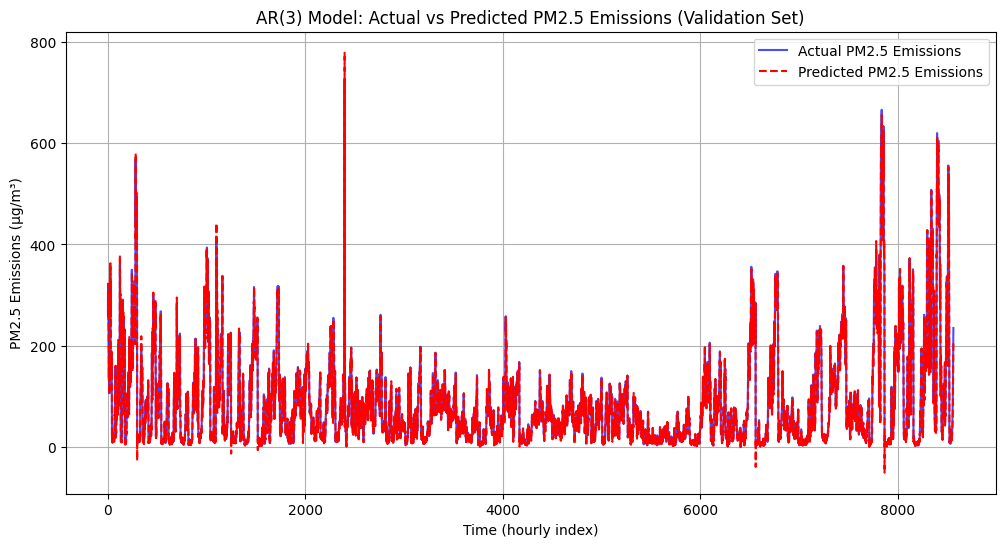

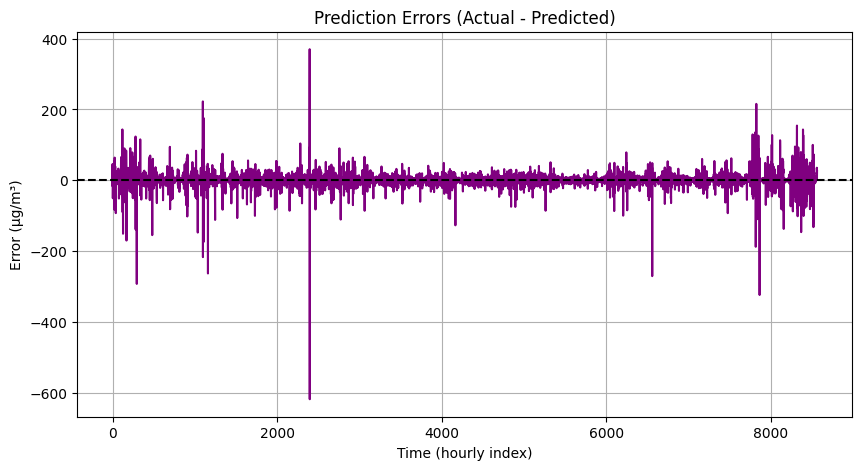

Mean Absolute Error (Training Set): 12.25 µg/m³
Mean Absolute Error (Validation Set): 10.52 µg/m³


In [164]:
# Code here
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Forecast for the validation set
X_validation = []
y_validation = []

# Create lagged features for validation data
for t in range(3, len(validation_data)):
    X_validation.append([validation_data[t-1], validation_data[t-2], validation_data[t-3]])
    y_validation.append(validation_data[t])

X_validation = np.array(X_validation)
y_validation = np.array(y_validation)

# Generate predictions using the AR(3) coefficients
y_validation_pred = X_validation @ beta

# Step 2: Plot predictions vs actual values for the validation set
plt.figure(figsize=(12, 6))
plt.plot(y_validation, label='Actual PM2.5 Emissions', color='blue', alpha=0.7)
plt.plot(y_validation_pred, label='Predicted PM2.5 Emissions', color='red', linestyle='--')
plt.title('AR(3) Model: Actual vs Predicted PM2.5 Emissions (Validation Set)')
plt.xlabel('Time (hourly index)')
plt.ylabel('PM2.5 Emissions (µg/m³)')
plt.legend()
plt.grid()
plt.show()

# Step 3: Calculate and plot the prediction errors
errors = y_validation - y_validation_pred

plt.figure(figsize=(10, 5))
plt.plot(errors, label='Prediction Errors', color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Prediction Errors (Actual - Predicted)')
plt.xlabel('Time (hourly index)')
plt.ylabel('Error (µg/m³)')
plt.grid()
plt.show()

# Step 4: Compute Mean Absolute Error (MAE)
def calculate_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Compute MAE for training data
y_train_pred = X_train @ beta
mae_train = calculate_mae(y_train, y_train_pred)

# Compute MAE for validation data
mae_validation = calculate_mae(y_validation, y_validation_pred)

print(f"Mean Absolute Error (Training Set): {mae_train:.2f} µg/m³")
print(f"Mean Absolute Error (Validation Set): {mae_validation:.2f} µg/m³")


Comments here:


## 4. Hypothesis tests

------------------------------------------------------------------------------------------------------
4.1. You will compare the average PM2.5 emissions measured at the US embassy in Beijing (PM_US Post_y), during winter with emissions reported by Chinese authorities in Nongzhanguan (PM_Nongzhanguan), a district of Beijing close to the US embassy.

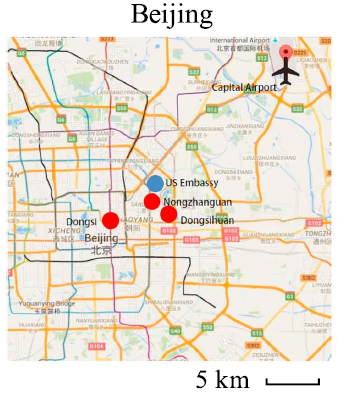


a) Reload the data from 'BeijingPM.csv' file. Keep data from the 1/1/2012 and 31/12/2015 in winter time(season 4). Take care to remove missing data (NA) and keep only days for which PM2.5 emissions are available **both** in Nongzhanguan (PM_Nongzhanguan) and Beijing (PM_US Post), to keep the same number of observations.

------------------------------------------------------------------------------------------------------

In [165]:
# Code here
import csv

# Step 1: Load data and filter by date and season
beijing_data = []
with open('BeijingPM.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        # Keep only data between 1/1/2012 and 31/12/2015
        if 2012 <= int(row['year']) <= 2015:
            # Step 2: Focus on winter season (season=4)
            if row['season'] == '4':
                # Step 3: Check if both PM_Nongzhanguan and PM_US Post are not 'NA'
                if row['PM_Nongzhanguan'] != 'NA' and row['PM_US Post'] != 'NA':
                    # Store necessary information in a clean dictionary format
                    beijing_data.append({
                        'year': int(row['year']),
                        'month': int(row['month']),
                        'day': int(row['day']),
                        'hour': int(row['hour']),
                        'PM_Nongzhanguan': float(row['PM_Nongzhanguan']),
                        'PM_US_Post': float(row['PM_US Post'])
                    })

# Check the number of observations after filtering
print(f"Number of observations retained: {len(beijing_data)}")


Number of observations retained: 5819


b) Perfom a  the Stutent's T test to check if the average hourly PM2.5 emissions are the same in Nongzhanguan and at the US embassy. The null hypothesis is

$H_0$: $\mu_{US} = \mu_{Nongzhanguan}$.

Use a confidence level of 5%. Take care to comment your conclusions. Are all assumptions required to perform this test sastisfied?


In [166]:
# Code here
import scipy.stats as stats

# Extract PM2.5 values for Nongzhanguan and US Post
pm_nongzhanguan = [row['PM_Nongzhanguan'] for row in beijing_data]
pm_us_post = [row['PM_US_Post'] for row in beijing_data]

# Step 3: Perform the T-test
t_statistic, p_value = stats.ttest_ind(pm_us_post, pm_nongzhanguan)

# Calculate means for both groups
mean_us_post = sum(pm_us_post) / len(pm_us_post)
mean_nongzhanguan = sum(pm_nongzhanguan) / len(pm_nongzhanguan)

# Display results
alpha = 0.05  # significance level
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")
print(f"Mean PM2.5 (US Post): {mean_us_post}")
print(f"Mean PM2.5 (Nongzhanguan): {mean_nongzhanguan}")

# Step 5: Decision
if p_value < alpha:
    print("Reject the null hypothesis: The average PM2.5 emissions are significantly different.")
else:
    print("Fail to reject the null hypothesis: The average PM2.5 emissions are not significantly different.")


T-statistic: 3.661707972656801
P-value: 0.00025164973246048154
Mean PM2.5 (US Post): 124.35126310362605
Mean PM2.5 (Nongzhanguan): 116.19247293349373
Reject the null hypothesis: The average PM2.5 emissions are significantly different.


Comment here:


c) Explain the Wilcoxon's test. What is the main advantage of this test compared to the Student's T test. Why is this useful in our project? 

Comment here:

d) Apply the Wilcoxon's test to distributions of the hourly PM2.5 emissions in Nongzhanguan and at the US embassy. What can you conclude ?

In [167]:
# Code here
import scipy.stats as stats

# Extract PM2.5 values for Nongzhanguan and US Post
pm_nongzhanguan = [row['PM_Nongzhanguan'] for row in beijing_data]
pm_us_post = [row['PM_US_Post'] for row in beijing_data]

# Step 3: Perform the Wilcoxon rank-sum test
w_statistic, p_value_wilcoxon = stats.ranksums(pm_us_post, pm_nongzhanguan)

# Display results
alpha = 0.05  # significance level
print(f"W-statistic: {w_statistic}")
print(f"P-value: {p_value_wilcoxon}")

# Step 5: Decision
if p_value_wilcoxon < alpha:
    print("Reject the null hypothesis: The distributions of PM2.5 emissions are significantly different.")
else:
    print("Fail to reject the null hypothesis: The distributions of PM2.5 emissions are not significantly different.")


W-statistic: 3.9624455791106037
P-value: 7.418592072477627e-05
Reject the null hypothesis: The distributions of PM2.5 emissions are significantly different.


Comment here:

